In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
import cv2
import matplotlib.image
from glob import glob
import torch
from model_factory import get_model
import argparse
from model_factory import UNet

In [2]:
"""configurations"""
device = torch.device("cuda:0")

class Test():
    def __init__(self, model_name) -> None:
        self.dilation = False
        self.resize = True
        self.config = None
        name = model_name
        f = open('/root/autoencoder_denoiser/configs/'+ name + '.json')
        self.config = json.load(f)
        experiment_dir = f"/root/autoencoder_denoiser/results_new_SNR/{name}/"
        state_dict = torch.load(os.path.join(experiment_dir, 'latest_model.pt'))
        model = get_model(self.config)
        model = torch.nn.DataParallel(model)
        model.load_state_dict(state_dict['model'])
        model.to(device)
        self.model = model

        
my_model_test = Test("t1_03")
paper_1d_test = Test("paper_1d")




model :UNet
model: Unet config as the paper indicated)


In [3]:
# img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
# clean_dir = os.path.join(img_dir, "real_hsqc_clean")
# noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
# criterion = torch.nn.MSELoss()
# clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
# custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

# for img_path in glob(noisy_dir+"/*"):
#     img = Image.open(img_path)
#     img = np.array(img)
    
#     plt.imshow(img,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
    
#     # print(img.shape)
#     plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus = 1-img[:,:, 2]/255
#     # print(plus.shape)
#     img_result = plus-minus
#     resized = cv2.resize(img_result.astype("float32"), (120, 180))
#     img_input = torch.tensor(img_result).unsqueeze(0).unsqueeze(0).float().to(device)
    
#     gound_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_HSQC_noisy","_HSQC_original")
#     gound_path = gound_path[:-5] + '1.png'
#     print(gound_path)
#     img = Image.open(gound_path)
#     img = np.array(img)
#     plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
#     minus_groud = 1-img[:,:, 2]/255
#     groud_truth = plus_groud - minus_groud
    
#     plt.imshow(groud_truth,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     groud_truth = torch.tensor(groud_truth).unsqueeze(0).unsqueeze(0).float().to(device)
#     # print(img_input.shape)
    
#     denoised_1 = my_model_test.model.forward(img_input)
#     loss_1 = criterion(denoised_1,groud_truth )
#     denoised_1 = denoised_1[0,0].cpu().detach().numpy()   
#     plt.imshow(denoised_1,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
#     denoised_2 = paper_1d_test.model.forward(img_input)
#     loss_2 = criterion(denoised_2,groud_truth )
#     denoised_2 = denoised_2[0,0].cpu().detach().numpy()  
#     plt.imshow(denoised_2,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
#     plt.figure()
    
#     print(f"loss of my_model is {loss_1} and previous paper model is {loss_2}")
#     break
    
# img_path

[-0.25472113 -0.01304684 -0.4411242  ... -0.0075719  -0.09735294
 -0.6884532 ]
/root/autoencoder_denoiser/dataset/real_img_referral_for_testing/real_hsqc_clean/Quercetin_HSQC_original_1.png
tensor([[[[-0.3275, -0.2541, -0.1413],
          [-0.3195, -0.0129, -0.2992],
          [ 0.1802,  0.1678,  0.0644]]],


        [[[ 0.2534, -0.0272,  0.1951],
          [-0.2399, -0.0618, -0.3014],
          [-0.0280, -0.2202,  0.2973]]],


        [[[ 0.2296,  0.2449,  0.0989],
          [-0.1978,  0.2935, -0.3306],
          [-0.2164, -0.2055, -0.1399]]],


        [[[ 0.0646, -0.2498, -0.2583],
          [-0.1578,  0.2101, -0.2388],
          [-0.2924, -0.2908, -0.1700]]],


        [[[-0.0795, -0.3371, -0.1521],
          [ 0.0042,  0.0547, -0.0475],
          [-0.0424, -0.2152,  0.1698]]],


        [[[-0.0842, -0.2216, -0.0771],
          [-0.0453,  0.3175,  0.1717],
          [-0.1317, -0.0477,  0.2917]]],


        [[[ 0.2143,  0.0799, -0.1086],
          [ 0.2905,  0.1400, -0.1358],
      

'/root/autoencoder_denoiser/dataset/real_img_referral_for_testing/real_hsqc_noisy/Quercetin_HSQC_noisy_4.png'

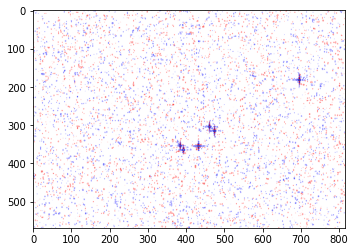

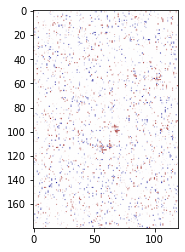

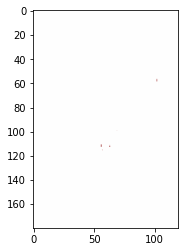

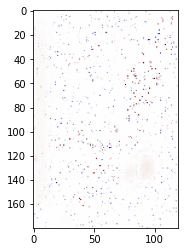

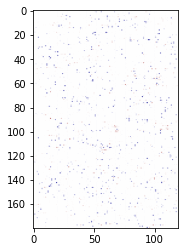

<Figure size 432x288 with 0 Axes>

In [10]:
img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
clean_dir = os.path.join(img_dir, "real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
criterion = torch.nn.MSELoss()
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

for img_path in glob(noisy_dir+"/*"):
    img = Image.open(img_path)
    img = np.array(img)
    
    plt.imshow(img,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    plt.figure()
    
    '''input'''
    # print(img.shape)
    plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus = 1-img[:,:, 2]/255
    # print(plus.shape)
    img_result = plus-minus
    resized = cv2.resize(img_result.astype("float32"), (120, 180))
    img_input = torch.tensor(resized).unsqueeze(0).unsqueeze(0).float().to(device)
    plt.imshow(resized,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    plt.figure()
    print(resized[resized<0])
    
    '''ground truth'''
    gound_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_HSQC_noisy","_HSQC_original")
    gound_path = gound_path[:-5] + '1.png'
    print(gound_path)
    img = Image.open(gound_path)
    img = np.array(img)
    plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus_groud = 1-img[:,:, 2]/255
    ground_truth = plus_groud - minus_groud
    ground_truth = cv2.resize(ground_truth.astype("float32"), (120, 180))
    
    plt.imshow(ground_truth,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    plt.figure()
    ground_truth = torch.tensor(ground_truth).unsqueeze(0).unsqueeze(0).float().to(device)
    # print(img_input.shape)
    
    '''denoised 1 and 2'''
    denoised_1 = my_model_test.model.forward(img_input)
    loss_1 = criterion(denoised_1,ground_truth )
    denoised_1 = denoised_1[0,0].cpu().detach().numpy()   
    plt.imshow(denoised_1,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    plt.figure()
    denoised_2 = paper_1d_test.model.forward(img_input)
    loss_2 = criterion(denoised_2,ground_truth )
    denoised_2 = denoised_2[0,0].cpu().detach().numpy()  
    plt.imshow(denoised_2,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    plt.figure()
    # print(my_model_test.model.module.inc.double_conv[0].weight.data)

    print(f"loss of my_model is {loss_1} and previous paper model is {loss_2}")
    break
    
img_path

  0%|          | 0/42 [00:00<?, ?it/s]/tmp/ipykernel_49052/1802506006.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img_input = torch.tensor(img_input).unsqueeze(1).float().to(device)
/tmp/ipykernel_49052/1802506006.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ground_truth = torch.tensor(ground_truth).unsqueeze(1).float().to(device)
 14%|█▍        | 6/42 [00:03<00:16,  2.14it/s]

tensor(116.2168, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 42/42 [00:05<00:00,  8.21it/s]

test loader size: 42
loss of my_model is 88.12289428710938 and previous paper model is 35.65738296508789


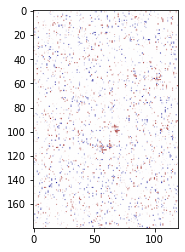

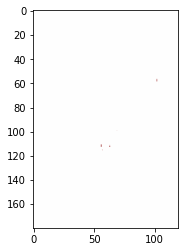

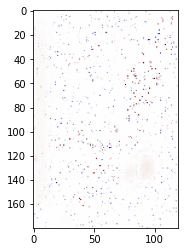

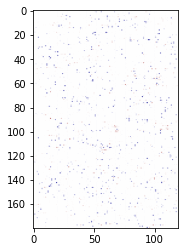

<Figure size 432x288 with 0 Axes>

In [30]:
from hsqc_dataset import *
from tqdm import tqdm
config = my_model_test.config
batch = config["dataset"]['batch_size']
shuffle=config["dataset"]['shuffle']

test_loader = DataLoader(RealNoiseDataset_Byeol(config), batch_size=1, shuffle=shuffle, num_workers=os.cpu_count())

criterion = torch.nn.MSELoss(reduction="sum")
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

displayed=False
loss_1, loss_2= 0, 0
for iter, data in enumerate(tqdm(test_loader)):
    img_input , ground_truth  = data
    if not displayed:
        plt.imshow(img_input[0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
        plt.figure()
        plt.imshow(ground_truth[0],cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
        plt.figure()
        
    img_input = torch.tensor(img_input).unsqueeze(1).float().to(device)
    ground_truth = torch.tensor(ground_truth).unsqueeze(1).float().to(device)
    '''denoised 1 and 2'''
    denoised_1 = my_model_test.model.forward(img_input)
    # print(denoised_1.shape)
    # print(ground_truth.shape)
    loss_1 += criterion(denoised_1,ground_truth )
    
    denoised_2 = paper_1d_test.model.forward(img_input)
    loss_2 += criterion(denoised_2,ground_truth )
    
    if not displayed:
        # print(my_model_test.model.module.inc.double_conv[0].weight.data)
        denoised_1 = denoised_1[0,0].cpu().detach().numpy()   
        denoised_2 = denoised_2[0,0].cpu().detach().numpy()  
        plt.imshow(denoised_1,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
        plt.figure()
        plt.imshow(denoised_2,cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
        plt.figure()
        displayed = True
        print(loss_1)
     
loss_2 /= len(test_loader.dataset)    
loss_1 /= len(test_loader.dataset)    
print("test loader size:" , len(test_loader.dataset))
print(f"loss of my_model is {loss_1} and previous paper model is {loss_2}")
    
    

In [29]:
for i in enumerate(tqdm(test_loader)):
    print(i)
    break
shuffle

  0%|          | 0/21 [00:00<?, ?it/s]

(0, [tensor([[[ 0.0296,  0.0000,  0.0000,  ...,  0.0000,  0.1614,  0.0022],
         [ 0.0559,  0.1998,  0.0000,  ...,  0.0000,  0.3090,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0653, -0.0174],
         ...,
         [ 0.0000,  0.0028,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0161, -0.0388,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.1918,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]],

        [[ 0.0000,  0.0011,  0.0000,  ...,  0.0000,  0.0000,  0.1755],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, -0.0869, -0.1573],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000, -0.2553],
         ...,
         [ 0.0000,  0.3569,  0.0000,  ...,  0.0000,  0.3567,  0.0000],
         [ 0.0000,  0.1143,  0.0000,  ...,  0.0000,  0.0000, -0.1981],
         [ 0.0000, -0.1574,  0.0000,  ...,  0.0000,  0.0000, -0.0125]]]), tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 

  0%|          | 0/21 [00:04<?, ?it/s]


False

In [ ]:
print(img[:,:, 2])
plt.imshow(img[:,:, 2])
# blue

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed